# Problem Statement

### Use regression analysis to predict the price of a property

In [288]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [289]:
#reading the dataset
data = pd.read_csv('E:\Imarticus\Datasets\ProjectonPropertyPricePrediction\Dataset/HousePrices.csv')

In [290]:
df = pd.DataFrame(data)

In [291]:
df.head(5) # shows the first five data points

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [292]:
#information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [293]:
df.drop('Id',axis=1,inplace=True)

<AxesSubplot:>

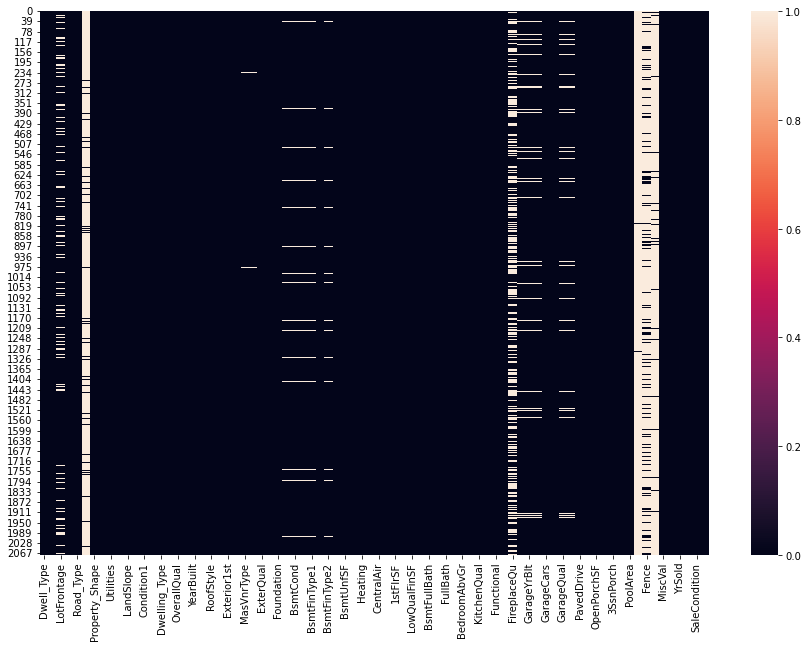

In [294]:
# heatmap to visualize the missing values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

### There are several missing values in many features

In [295]:
df['Dwell_Type'].unique()

array([  60,   20,   70,   50,  190,   45,   90,  120,   30,   85,   80,
        160,   75,  180,   40,  150,  303, 7080], dtype=int64)

In [296]:
df.drop(df[df.Dwell_Type ==303].index , axis=0 , inplace=True)
df.drop(df[df.Dwell_Type ==7080].index , axis=0, inplace=True)
# According to feature description the values 303 and 7080 are wrongly entered

<AxesSubplot:xlabel='Zone_Class', ylabel='count'>

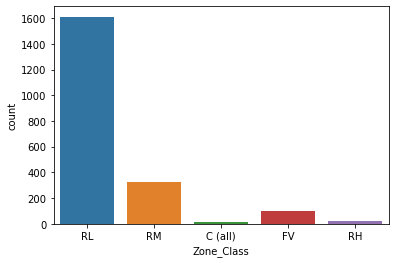

In [297]:
sns.countplot(df['Zone_Class'])

<AxesSubplot:xlabel='Road_Type', ylabel='count'>

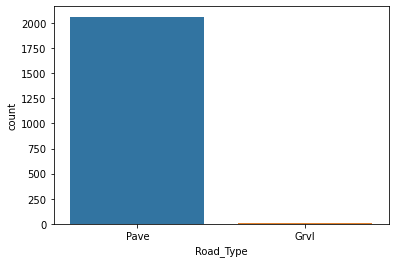

In [298]:
sns.countplot(df['Road_Type'])

In [299]:
#the plot showws it is an imbalanced data
df.drop('Road_Type',axis = 1,inplace=True)

<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Alley'>

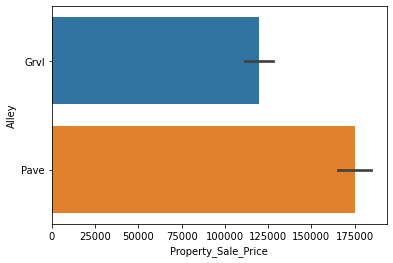

In [300]:
sns.barplot(y=df['Alley'] , x=df['Property_Sale_Price'],orient='h')

In [301]:
df['LandContour'].value_counts()

Lvl    1852
Bnk      92
HLS      76
Low      51
Name: LandContour, dtype: int64

In [302]:
df.drop('LandContour' , axis=1 , inplace=True)

In [303]:
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [304]:
df['Utilities'].value_counts()#imbalance data

AllPub    2068
NoSeWa       3
Name: Utilities, dtype: int64

In [305]:
df.drop('Utilities' , axis=1 , inplace=True)

In [306]:
df.LotConfig.value_counts()

Inside     1480
Corner      385
CulDSac     137
FR2          65
FR3           4
Name: LotConfig, dtype: int64

In [307]:
df['LotConfig']=df['LotConfig'].replace('FR3','FR2')

<AxesSubplot:xlabel='Property_Sale_Price', ylabel='LotConfig'>

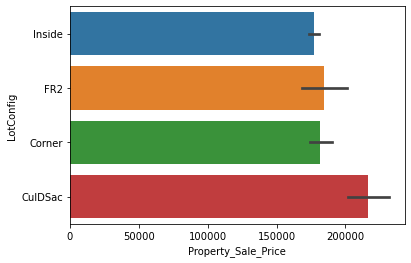

In [308]:
sns.barplot(y=df['LotConfig'] , x=df['Property_Sale_Price'] ,orientation='horizontal')
#  Inside Inside lot
#  Corner Corner lot
#  CulDSac Cul-de-sac
#  FR2 Frontage on 2 sides of property
#  FR3 Frontage on 3 sides of property

In [309]:
df.LandSlope.value_counts()

Gtl    1957
Mod     100
Sev      14
Name: LandSlope, dtype: int64

In [310]:
df.drop('LandSlope' , axis=1 , inplace=True)

In [311]:
df['LotConfig'].value_counts()

Inside     1480
Corner      385
CulDSac     137
FR2          69
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='Neighborhood', ylabel='Property_Sale_Price'>

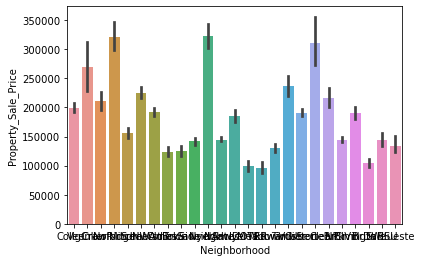

In [312]:
sns.barplot(x=df['Neighborhood'] , y=df['Property_Sale_Price'])

In [313]:
df.drop('Neighborhood' , axis=1 , inplace=True)

# replacing the values 

In [314]:
#the plot showws it is an imbalanced data
df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean(),inplace=True)
df['Alley']=df['Alley'].replace(np.nan , 'NA')
df['FireplaceQu'].replace(np.nan,'Na',inplace=True)
df['Fence'].replace(np.nan,'Na',inplace=True)
df['PoolQC'].replace(np.nan,'Na',inplace=True)
df['Fence'].replace(np.nan,'Na',inplace=True)
df['MiscFeature'].replace(np.nan,'Na',inplace=True)
df['LotFrontage'].replace(np.nan,df['LotFrontage'].mean(),inplace=True)
df['MasVnrType'].replace(np.nan,df['MasVnrType'].mode()[0],inplace=True)
df['MasVnrArea'].replace(np.nan,df['MasVnrArea'].mode()[0],inplace=True)
df['BsmtQual'].replace(np.nan,'Na',inplace=True)
df['BsmtCond'].replace(np.nan,'Na',inplace=True)
df['BsmtExposure'].replace(np.nan,'Na',inplace=True)
df['BsmtFinType1'].replace(np.nan,'Na',inplace=True)
df['BsmtFinType2'].replace(np.nan,df['BsmtFinType2'].mode()[0],inplace=True)
df['Electrical'].replace(np.nan,df['Electrical'].mode()[0],inplace=True)
df['GarageType'].replace(np.nan,'Na',inplace=True)
df['GarageYrBlt'].replace(np.nan,df['GarageYrBlt'].mode()[0],inplace=True)
df['GarageFinish'].replace(np.nan,'Na',inplace=True)
df['GarageQual'].replace(np.nan,'Na',inplace=True)
df['GarageCond'].replace(np.nan,'Na',inplace=True)

In [315]:
df['age']=2022-df.YearBuilt
# creatin new feature called age

In [316]:
df.drop('YearBuilt',axis=1,inplace=True)

In [317]:
df['no_of_years_after_remodel']=2022-df.YearRemodAdd
#creating a new feature called no_of_years_after_remodel

In [318]:
df.drop('YearRemodAdd',axis=1,inplace=True)

In [319]:
df.RoofStyle.value_counts()

Gable      1604
Hip         420
Flat         19
Gambrel      15
Mansard      11
Shed          2
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='Property_Sale_Price'>

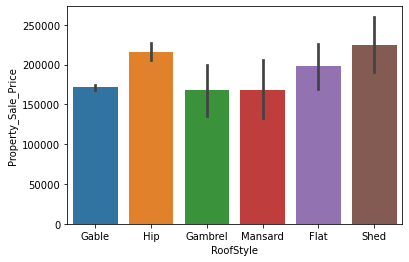

In [320]:
sns.barplot(x=df['RoofStyle'] , y=df['Property_Sale_Price'])

In [321]:
df.drop('RoofMatl',axis=1, inplace=True)

In [322]:
# import scipy.stats as stats
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(df['Exterior1st'], df['Property_Sale_Price'])
# print(fvalue, pvalue)

In [323]:
df.drop('YrSold',axis=1,inplace=True)

# Encoding The Ordinal Data

In [324]:
mapping={'TA':2,'Gd':3,'Ex':4,'Fa':1}
df['ExterQual']=df['ExterQual'].map(mapping)

In [325]:
mapping={'TA':3,'Gd':4,'Ex':5,'Fa':2,'Na':1}
df['BsmtQual']=df['BsmtQual'].map(mapping)

In [326]:
mapping={'TA':4,'Gd':5,'Ex':6,'Fa':3,'Po':2,'Na':1}
df['BsmtCond']=df['BsmtCond'].map(mapping)

In [327]:
mapping={'No':2, 'Av':4, 'Gd':5, 'Mn':3, 'Na':1}
df['BsmtExposure']=df['BsmtExposure'].map(mapping)

In [328]:
mapping={'Unf':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Na':1}
df['BsmtFinType1']=df['BsmtFinType1'].map(mapping)

In [329]:
mapping={'Unf':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Na':1}
df['BsmtFinType2']=df['BsmtFinType2'].map(mapping)

In [330]:
mapping={'Ex':5, 'TA':3, 'Gd':4, 'Fa':2, 'Po':1}
df['HeatingQC']=df['HeatingQC'].map(mapping)

In [331]:
mapping={'TA':2, 'Gd':3, 'Ex':4, 'Fa':1}
df['KitchenQual']=df['KitchenQual'].map(mapping)

In [332]:
mapping={'Na':1, 'Gd':5, 'TA':4, 'Fa':3, 'Ex':6, 'Po':2}
df['FireplaceQu']=df['FireplaceQu'].map(mapping)

In [333]:
mapping={'Na':1, 'Gd':5, 'TA':4, 'Fa':3, 'Ex':6, 'Po':2}
df['GarageQual']=df['GarageQual'].map(mapping)

In [334]:
mapping={'Na':1, 'Gd':5, 'TA':4, 'Fa':3, 'Ex':6, 'Po':2}
df['GarageCond']=df['GarageCond'].map(mapping)

In [335]:
mapping={'Gd':4, 'TA':3, 'Fa':2, 'Ex':5, 'Na':1}
df['PoolQC']=df['PoolQC'].map(mapping)

In [336]:
mapping={'Na':1, 'MnPrv':4, 'GdPrv':5, 'GdWo':3, 'MnWw':2}
df['Fence']=df['Fence'].map(mapping)

In [337]:
mapping={'EX':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
df['ExterCond']=df['ExterCond'].map(mapping)

# OneHotEncoding

In [339]:
a=pd.get_dummies(df[['Dwelling_Type','Zone_Class','Alley','Property_Shape',
                    'LotConfig','Condition1','Condition2','HouseStyle',
                    'RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
                     'Foundation','Heating','CentralAir','Electrical','Functional',
                     'GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']],drop_first=True)

In [340]:
a
# onehot encoded data

,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Alley_NA,Alley_Pave,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2069,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2070,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2071,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
df.drop(['Dwelling_Type','Zone_Class','Alley','Property_Shape',
                    'LotConfig','Condition1','Condition2','HouseStyle',
                    'RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
                     'Foundation','Heating','CentralAir','Electrical','Functional',
                     'GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [342]:
df=pd.concat([df,a],axis=1)

In [343]:
df.shape

(2071, 174)

# Model

In [344]:
a=df['ExterCond'].mode()[0]
df['ExterCond']=df['ExterCond'].replace(np.nan ,a )

In [345]:
#Apply the linear Regression
# X and Y
x=df.drop('Property_Sale_Price',axis=1)
y=df['Property_Sale_Price']

In [346]:
#train and test data
x_train ,x_test ,  y_train , y_test =train_test_split(x,y,test_size=0.3,random_state=0)

# Linear Regression

In [378]:
#model 
model=LinearRegression()

In [379]:
#model
model.fit(x_train,y_train)

LinearRegression()

In [380]:
model.score(x_train,y_train)

0.8821313539419977

In [381]:
model.score(x_test,y_test)

0.7265857016357224

# SGD

In [351]:
from sklearn.linear_model import SGDRegressor

In [352]:
sgd = SGDRegressor(loss = "squared_loss", alpha = 0.1, max_iter = 1000)

In [353]:
sgd.fit(x_train, y_train)

SGDRegressor(alpha=0.1)

In [354]:
sgd.score(x_train,y_train)

-2.176834665609807e+25

In [355]:
sgd.score(x_test,y_test)

-2.7388859378224204e+25

# Robust Scalar

In [356]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
train_scalar=scalar.fit_transform(x_train)
test_scalar=scalar.transform(x_test)

In [357]:
model.fit(train_scalar,y_train)

LinearRegression()

In [358]:
model.score(train_scalar,y_train)

0.8821313539419977

In [359]:
model.score(test_scalar,y_test)

0.7265857016354715

# Standard Scalar

In [360]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train_scalar1=scalar.fit_transform(x_train)
test_scalar1=scalar.transform(x_test)

In [361]:
model.fit(train_scalar1,y_train)
model.score(train_scalar1,y_train)

0.8820007141847614

In [362]:
model.score(test_scalar1,y_test)

-5.1387508490082e+16

# Decison Tree

In [363]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [364]:
dTree=DecisionTreeClassifier(criterion= 'gini',random_state=0)
dTree.fit(x_train , y_train)

DecisionTreeClassifier(random_state=0)

In [365]:
dTree.score(x_train , y_train)

1.0

In [366]:
dTree.score(x_test , y_test)

0.3054662379421222

# RandomForest

In [367]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,
                               max_depth=13,
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rf.fit(x_train, y_train)
#Train data
rf.score(x_train,y_train)*100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished


98.25844317840553

In [368]:
rf.score(x_test,y_test)*100

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished


91.10204329942889

In [369]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


# xgboost

In [370]:
import xgboost as xgb
model_2 = xgb.XGBRegressor()
model_2.fit(x_train,y_train)
model_2.score(x_train,y_train)*100

99.951681998891

In [371]:
model_2.score(x_test,y_test)*100

91.71384320637664

# PCA

In [372]:
### step1 => scale the data using satndard scalar

In [373]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
train2=scalar.fit_transform(x_train)
test2=scalar.transform(x_test)

In [374]:
### step =>covariance matrix

In [375]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(train2.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00069061 -0.26355625 -0.10518017 ...  0.0043551   0.0347529
  -0.04329201]
 [-0.26355625  1.00069061  0.26834918 ... -0.00885075 -0.03333987
   0.09209048]
 [-0.10518017  0.26834918  1.00069061 ... -0.01741769  0.00800352
   0.04470815]
 ...
 [ 0.0043551  -0.00885075 -0.01741769 ...  1.00069061 -0.21236548
  -0.0291576 ]
 [ 0.0347529  -0.03333987  0.00800352 ... -0.21236548  1.00069061
  -0.63424897]
 [-0.04329201  0.09209048  0.04470815 ... -0.0291576  -0.63424897
   1.00069061]]
Eigenvectors 
[[ 0.01229418  0.15162251  0.02582154 ...  0.          0.
   0.        ]
 [-0.06747695 -0.03859795 -0.13767764 ...  0.          0.
   0.        ]
 [-0.03816162 -0.05060147 -0.11905043 ...  0.          0.
   0.        ]
 ...
 [ 0.00573635 -0.0085634  -0.01447693 ...  0.          0.
   0.        ]
 [ 0.05552742 -0.07211237 -0.08521    ...  0.          0.
   0.        ]
 [-0.11702519  0.09713779  0.09585761 ...  0.          0.
   0.        ]]

Eigenvalues 
[ 1.42333902e+0

In [376]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  8.41631199  12.05002482  15.0840698   17.86973222  20.34337098
  22.56176866  24.56426756  26.34879479  28.00954474  29.57021107
  31.09675251  32.53808126  33.93947382  35.2877064   36.57855986
  37.85014561  39.11008891  40.32773495  41.54391904  42.73911284
  43.91001123  45.06373544  46.17619679  47.2591229   48.30996135
  49.33791125  50.35125534  51.3446257   52.27935238  53.20569051
  54.11269911  55.00003917  55.88548459  56.74704384  57.5932907
  58.43479389  59.26038322  60.06942919  60.86261531  61.64429943
  62.41102105  63.1674997   63.91194324  64.64919184  65.3715804
  66.08971432  66.79857673  67.49006287  68.17358263  68.8501588
  69.51353563  70.17187723  70.82734641  71.46193662  72.09453585
  72.71936261  73.33334986  73.93902017  74.5389429   75.1368255
  75.72577538  76.30848096  76.88862778  77.45937173  78.00838319
  78.55575447  79.09564989  79.62611701  80.15558359  80.66624156
  81.17670795  81.67603304  82.1665643   82.645931

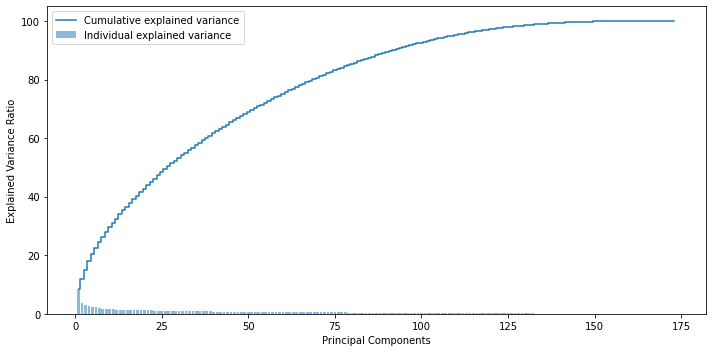

In [377]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# each principal component is the dot product of its weights 